### Import packages for model development

In [1]:
# import libraries for data balancing
import imblearn.combine as c_sampling
import imblearn.over_sampling as o_sampling
import imblearn.pipeline
import imblearn.under_sampling as u_sampling

# import libraries for data manipulation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#import libraries for model training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

### Import credit card dataset

In [2]:
df = pd.read_csv('../../datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.drop(columns='Class')
y = df['Class']

### Train baseline model

In [4]:
# define model
model = DecisionTreeClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.878


### Balancing Techniques
##### Oversampling
###### SMOTE

In [5]:
over_s1 = o_sampling.SMOTE()
X_sam1, y_sam1 = over_s1.fit_resample(X, y)

In [6]:
def add_data_labels_bar(x,y, pos):
    y_total = y.sum()
    for i in range(len(x)):
        plt.text(i, y[i] + pos, f'{y[i]:,} ({round((y[i] * 100)/ y_total, 1)}%)', ha = 'center')

In [7]:
def plot_sampled_y_dist(y, technique):
    g = y.value_counts()
    plt.figure(figsize=[12, 8])
    plt.bar(g.index, g.values)
    add_data_labels_bar(g.index, g.values, 2000)
    plt.xticks([0, 1], labels=['Non-fraudulent', 'Fraudulent'])
    plt.xlabel('Credit Card Transactions')
    plt.title(f'Frequency Distribution of Transactions ({technique})');

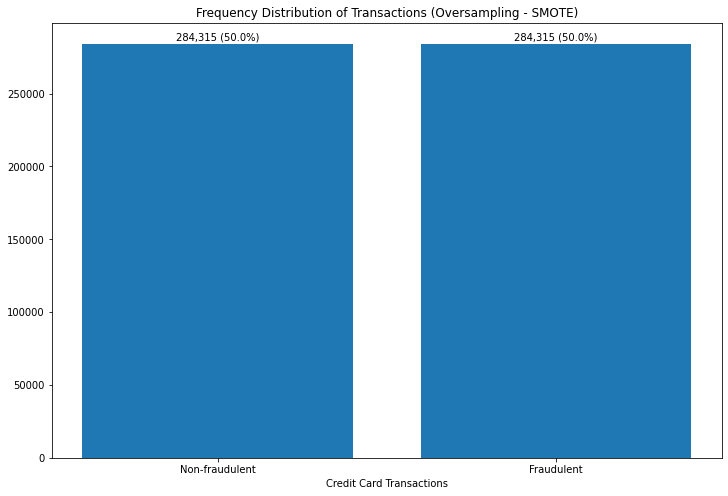

In [8]:
plot_sampled_y_dist(y_sam1, 'Oversampling - SMOTE')

##### Undersampling
###### CNN

In [10]:
under_s1 = u_sampling.CondensedNearestNeighbour(n_neighbors=1)
X_sam2, y_sam2 = under_s1.fit_resample(X, y)

KeyboardInterrupt: 

In [ ]:
plot_sampled_y_dist(y_sam2, 'Undersampling - CNN')